1. Caricare i quartieri in un geodataframe

In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 45.7 MB/s 
     |████████████████████████████████| 15.4 MB 40.3 MB/s 


In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm (1)/NIL_WM.dbf')
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


2. Visualizzare l'intestazione

In [ ]:
quartieri.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

3. Visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico

In [ ]:
quartieri.sort_values('NIL',ascending=True)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."
36,87,ASSIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,16203.755410,5.840942e+06,125,"POLYGON ((9.04687 45.46276, 9.04688 45.46276, ..."
65,55,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11963.033873,3.471750e+06,154,"POLYGON ((9.09315 45.46938, 9.09393 45.46802, ..."
57,52,BANDE NERE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6776.458948,2.663780e+06,146,"POLYGON ((9.12727 45.46894, 9.12874 45.46840, ..."
...,...,...,...,...,...,...,...,...,...
31,32,TRIULZO SUPERIORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6923.734083,1.389578e+06,120,"POLYGON ((9.26378 45.43251, 9.26384 45.43248, ..."
44,28,UMBRIA - MOLISE - CALVAIRATE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4912.251168,1.192352e+06,133,"POLYGON ((9.22392 45.45969, 9.22392 45.45934, ..."
38,38,VIGENTINO - Q.RE FATIMA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6479.236348,1.853163e+06,127,"POLYGON ((9.20060 45.43608, 9.20429 45.43642, ..."
27,71,VILLAPIZZONE - CAGNOLA - BOLDINASCO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8375.003494,3.426941e+06,116,"POLYGON ((9.16204 45.49690, 9.16012 45.49570, ..."


4. visualizzare tutti i quartieri su una mappa di Milano


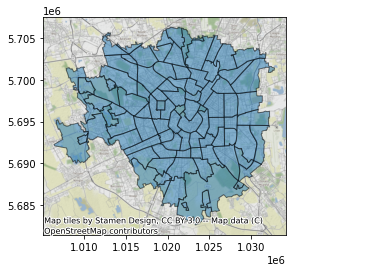

In [ ]:
!pip install contextily
import contextily as ctx
ax = quartieri.to_crs(epsg=3857).plot(alpha=0.5,edgecolor='k')
ctx.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano

In [ ]:
from shapely.geometry import Point
duomo_di_milano = Point(9.191383, 45.464211 )
quartieri[quartieri.contains(duomo_di_milano)]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

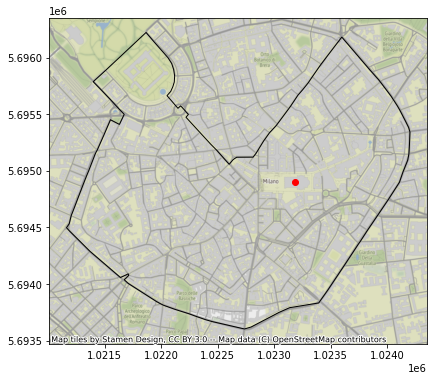

In [ ]:
ax = quartieri[quartieri.contains(duomo_di_milano)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none', figsize=(12,6))
geopandas.GeoSeries([duomo_di_milano], crs='EPSG:4326').to_crs(epsg=3857).plot(ax=ax, color='red')
ctx.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo

In [ ]:
q = quartieri[quartieri.contains(duomo)].geometry.squeeze()
quartieri[quartieri.touches(q)]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
13,4,GUASTALLA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6559.532771,1.547962e+06,102,"POLYGON ((9.20700 45.46787, 9.20712 45.46721, ..."
25,8,PARCO SEMPIONE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2966.984475,4.704203e+05,114,"POLYGON ((9.17958 45.47255, 9.17636 45.47043, ..."
34,6,PORTA TICINESE - CONCA DEL NAVIGLIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5293.159062,1.255017e+06,123,"POLYGON ((9.18740 45.45603, 9.18736 45.45584, ..."
60,5,PORTA VIGENTINA - PORTA LODOVICA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,4710.382643,1.135196e+06,149,"POLYGON ((9.20186 45.45238, 9.20115 45.45196, ..."
79,7,MAGENTA - S. VITTORE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5492.852406,1.390094e+06,168,"POLYGON ((9.17538 45.46981, 9.17606 45.46932, ..."


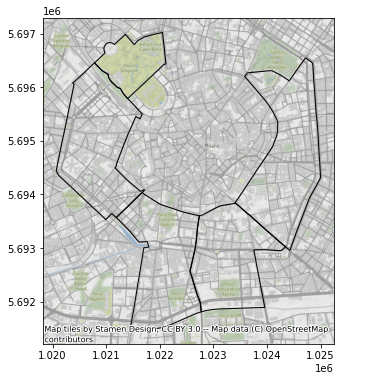

In [ ]:
ax = quartieri[quartieri.touches(q)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='none', figsize=(12,6))
ctx.add_basemap(ax)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
